# **Problem Statement**

## Predict Column Values for 'Para 9-13' in the time series dataset given.

### Submitted by: **Bhavya Tyagi, 102097014, 4CS2**

#### Final Result: Best 47.53224774629032 RMSE for Model ARMA

## 0. Utilties

In [1]:
import pandas as pd
import numpy as np
import math  
import sklearn.metrics  

# Models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read Data

In [78]:
data = pd.read_excel('DATASET.xlsx')
data = pd.DataFrame(data)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [79]:
df=pd.DataFrame(data)
data

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


## 2. Data Cleaning

In [80]:
df.drop(df.columns[[0,2,3,4,5,6,7,8,9]], axis=1, inplace=True)  # Keeping columns of interest
df

,year,Para-9,Para-10,Para-11,Para-12,Para-13
0,1,0.0,0.0,0.0,0,1.520
1,2,0.0,3.4,0.0,0,1.620
2,3,0.0,21.3,0.0,4,1.680
3,4,0.0,21.3,0.0,5,1.780
4,5,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...
1004,6,15.1,1.8,1.0,15,1.681
1005,7,24.6,7.9,2.0,15,1.838
1006,8,119.0,15.7,2.0,16,1.862
1007,9,138.2,30.5,6.0,18,1.883


In [69]:
X=df.loc[data['year']!=10]  # X is training set
X=X.reset_index(drop=True)
X

,year,Para-9,Para-10,Para-11,Para-12,Para-13
0,1,0.0,0.0,0.0,0,1.520
1,2,0.0,3.4,0.0,0,1.620
2,3,0.0,21.3,0.0,4,1.680
3,4,0.0,21.3,0.0,5,1.780
4,5,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...
904,5,19.0,0.0,0.0,15,1.654
905,6,15.1,1.8,1.0,15,1.681
906,7,24.6,7.9,2.0,15,1.838
907,8,119.0,15.7,2.0,16,1.862


In [70]:
y=df.loc[data['year']==10]  # y is testing set
y.reset_index(inplace=True,drop=True)
y

,year,Para-9,Para-10,Para-11,Para-12,Para-13
0,10,16.8,105.0,65.0,9,1.960
1,10,76.5,44.3,5.0,9,0.795
2,10,78.5,0.0,0.0,16,1.432
3,10,28.5,60.5,67.0,11,2.004
4,10,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...
95,10,219.7,206.2,10.0,8,1.607
96,10,5.9,74.5,33.0,13,1.087
97,10,131.4,72.4,18.0,12,0.996
98,10,193.7,305.6,180.0,12,2.212


### Adding Missing Target Value
Section 92 missing year 10 values, adding mean of all columns values for its target values

In [7]:
missing=[]
missing=list(np.mean(y))
missing =pd.DataFrame([missing])
missing.columns=['year',	'Para-9',	'Para-10',	'Para-11',	'Para-12',	'Para-13']
missing

,year,Para-9,Para-10,Para-11,Para-12,Para-13
0,10.0,86.237,160.5467,50.634,13.29,1.579


In [8]:
y = pd.concat([y.iloc[:91], missing, y.iloc[91:]]).reset_index(drop=True)
# y.iloc[92,2:]=missing
y

,year,Para-9,Para-10,Para-11,Para-12,Para-13
0,10.0,16.8,105.0,65.0,9.0,1.960
1,10.0,76.5,44.3,5.0,9.0,0.795
2,10.0,78.5,0.0,0.0,16.0,1.432
3,10.0,28.5,60.5,67.0,11.0,2.004
4,10.0,0.0,276.2,34.0,6.0,1.792
...,...,...,...,...,...,...
96,10.0,219.7,206.2,10.0,8.0,1.607
97,10.0,5.9,74.5,33.0,13.0,1.087
98,10.0,131.4,72.4,18.0,12.0,0.996
99,10.0,193.7,305.6,180.0,12.0,2.212


## 3. Verify Shape
Checking if training and testing set are compatible after cleaning.
- Training set contains 101 sections of 9 years of data.
- Testing set contains 101 enteries of 10th year data for each of those sections.

In [9]:
X.shape

(909, 6)

In [10]:
y.shape

(101, 6)

## 4. Apply Models
Applying different Time Series suitable ML Models to get the best RMSE possible.

### Moving Average (MA)

In [11]:
master_result=[]

for j in range(1,len(X.columns)):  # for each parameter
  result=[]
  for i in range(1,102):  # for each row entry
    model = ARIMA(X.iloc[9*i-9:9*i,j], order=(1, 0, 0))  # X.iloc[9*i-9:9*i,j] this fetches us sectionwise & columnwise 9 years values
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data))
    result.append(yhat)
  master_result.append(result)
print(master_result)

# similar mathematics is followed in upcoming models

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/

[[1009    0.987535
dtype: float64, 1018    27.847513
dtype: float64, 1027    38.359086
dtype: float64, 1036    9.940057
dtype: float64, 1045   -0.000005
dtype: float64, 1054    0.213649
dtype: float64, 1063   -0.000005
dtype: float64, 1072   -0.000005
dtype: float64, 1081   -0.000005
dtype: float64, 1090    3.07135
dtype: float64, 1099    14.811807
dtype: float64, 1108    44.845922
dtype: float64, 1117   -0.000005
dtype: float64, 1126    20.044561
dtype: float64, 1135    168.799787
dtype: float64, 1144    126.999721
dtype: float64, 1153    9.248567
dtype: float64, 1162   -0.000005
dtype: float64, 1171    47.991489
dtype: float64, 1180    135.545957
dtype: float64, 1189    0.041058
dtype: float64, 1198    261.222703
dtype: float64, 1207    226.205304
dtype: float64, 1216    31.799324
dtype: float64, 1225    173.06865
dtype: float64, 1234    3.180704
dtype: float64, 1243   -0.000005
dtype: float64, 1252   -0.000005
dtype: float64, 1261    161.079144
dtype: float64, 1270   -0.000005
dtype

#### Results and Error

In [12]:
master_error=[]
for j in range(1,len(X.columns)):
  mse = sklearn.metrics.mean_squared_error(y.iloc[:,j], master_result[j-1])  
  rmse = math.sqrt(mse)  
  master_error.append(rmse)
  print(f'Root Mean Square Error in Predicting {X.columns[j]}: {rmse}')

print(f'\nRoot Mean Square Error of Model: {np.mean(master_error)}')

Root Mean Square Error in Predicting Para-9: 93.3766443181114
Root Mean Square Error in Predicting Para-10: 95.86574468793057
Root Mean Square Error in Predicting Para-11: 42.66688478993615
Root Mean Square Error in Predicting Para-12: 17.892720155916138
Root Mean Square Error in Predicting Para-13: 0.3709948082155114

Root Mean Square Error of Model: 50.03459775202195


### Autoregressive Moving Average (ARMA)

In [13]:
master_result=[]

for j in range(1,len(X.columns)):
  result=[]
  for i in range(1,102):
    model = ARIMA(X.iloc[9*i-9:9*i,j], order=(2, 0, 1))
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data))
    result.append(yhat)
  master_result.append(result)
print(master_result)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

[[1009    0.98199
dtype: float64, 1018    25.656543
dtype: float64, 1027    38.016052
dtype: float64, 1036    17.089255
dtype: float64, 1045   -0.000005
dtype: float64, 1054    0.392012
dtype: float64, 1063   -0.000005
dtype: float64, 1072   -0.000005
dtype: float64, 1081   -0.000005
dtype: float64, 1090    7.412994
dtype: float64, 1099    16.109533
dtype: float64, 1108    40.030631
dtype: float64, 1117   -0.000005
dtype: float64, 1126    38.815843
dtype: float64, 1135    155.692761
dtype: float64, 1144    125.769456
dtype: float64, 1153    5.630648
dtype: float64, 1162   -0.000005
dtype: float64, 1171    35.520409
dtype: float64, 1180    114.7756
dtype: float64, 1189    0.034388
dtype: float64, 1198    352.160648
dtype: float64, 1207    213.194832
dtype: float64, 1216    27.877624
dtype: float64, 1225    168.635803
dtype: float64, 1234    1.827556
dtype: float64, 1243   -0.000005
dtype: float64, 1252   -0.000005
dtype: float64, 1261    161.669446
dtype: float64, 1270   -0.000005
dtype

#### Results and Error

In [14]:
master_error=[]
for j in range(1,len(X.columns)):
  mse = sklearn.metrics.mean_squared_error(y.iloc[:,j], master_result[j-1])  
  rmse = math.sqrt(mse)  
  master_error.append(rmse)
  print(f'Root Mean Square Error in Predicting {X.columns[j]}: {rmse}')

print(f'\nRoot Mean Square Error of Model: {np.mean(master_error)}')

Root Mean Square Error in Predicting Para-9: 85.4954171901648
Root Mean Square Error in Predicting Para-10: 93.12241371713266
Root Mean Square Error in Predicting Para-11: 40.81830743565491
Root Mean Square Error in Predicting Para-12: 17.885511418878014
Root Mean Square Error in Predicting Para-13: 0.33958896962122676

Root Mean Square Error of Model: 47.53224774629032


### Autoregressive Integrated Moving Average (ARIMA)


In [ ]:
master_result=[]

for j in range(1,len(X.columns)):
  result=[]
  for i in range(1,102):
    model = ARIMA(X.iloc[9*i-9:9*i,j], order=(1, 1, 1))
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data), typ='levels')
    result.append(yhat)
  master_result.append(result)
print(master_result)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

[[1009    3.399998
dtype: float64, 1018    63.932606
dtype: float64, 1027    7485.65733
dtype: float64, 1036    84.696014
dtype: float64, 1045    0.0
dtype: float64, 1054    1.883907
dtype: float64, 1063    0.0
dtype: float64, 1072    0.0
dtype: float64, 1081    0.0
dtype: float64, 1090    88.68562
dtype: float64, 1099    41.408723
dtype: float64, 1108    109.260331
dtype: float64, 1117    0.0
dtype: float64, 1126    461.234229
dtype: float64, 1135    31888.488112
dtype: float64, 1144    23717.934171
dtype: float64, 1153    21.975811
dtype: float64, 1162    0.0
dtype: float64, 1171    151.392597
dtype: float64, 1180    499.520273
dtype: float64, 1189    0.4
dtype: float64, 1198    838.803578
dtype: float64, 1207    2529.939242
dtype: float64, 1216    277.545403
dtype: float64, 1225    27656.622323
dtype: float64, 1234    7.734332
dtype: float64, 1243    0.0
dtype: float64, 1252    0.0
dtype: float64, 1261    20172.245984
dtype: float64, 1270    0.0
dtype: float64, 1279    26.2
dtype: f

#### Results and Error

In [ ]:
master_error=[]
for j in range(1,len(X.columns)):
  mse = sklearn.metrics.mean_squared_error(y.iloc[:,j], master_result[j-1])  
  rmse = math.sqrt(mse)  
  master_error.append(rmse)
  print(f'Root Mean Square Error in Predicting {X.columns[j]}: {rmse}')

print(f'\nRoot Mean Square Error of Model: {np.mean(master_error)}')

Root Mean Square Error in Predicting Para-9: 5710.441313734631
Root Mean Square Error in Predicting Para-10: 8447.80373404466
Root Mean Square Error in Predicting Para-11: 2478.7906384083567
Root Mean Square Error in Predicting Para-12: 622.6050650360913
Root Mean Square Error in Predicting Para-13: 33.0841612957651

Root Mean Square Error of Model: 3458.544982503902


### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [ ]:
master_result=[]

for j in range(1,len(X.columns)):
  result=[]
  for i in range(1,102):
    model = SARIMAX(X.iloc[9*i-9:9*i,j], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(data), len(data))
    result.append(yhat)
  master_result.append(result)
print(master_result)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

[[1009    3.399998
dtype: float64, 1018    63.932606
dtype: float64, 1027    7485.65733
dtype: float64, 1036    84.696014
dtype: float64, 1045    0.0
dtype: float64, 1054    1.883907
dtype: float64, 1063    0.0
dtype: float64, 1072    0.0
dtype: float64, 1081    0.0
dtype: float64, 1090    88.68562
dtype: float64, 1099    41.408723
dtype: float64, 1108    109.260331
dtype: float64, 1117    0.0
dtype: float64, 1126    461.234229
dtype: float64, 1135    31888.488112
dtype: float64, 1144    23717.934171
dtype: float64, 1153    21.975811
dtype: float64, 1162    0.0
dtype: float64, 1171    151.392597
dtype: float64, 1180    499.520273
dtype: float64, 1189    0.4
dtype: float64, 1198    838.803578
dtype: float64, 1207    2529.939242
dtype: float64, 1216    277.545403
dtype: float64, 1225    27656.622323
dtype: float64, 1234    7.734332
dtype: float64, 1243    0.0
dtype: float64, 1252    0.0
dtype: float64, 1261    20172.245984
dtype: float64, 1270    0.0
dtype: float64, 1279    26.2
dtype: f

#### Results and Error

In [ ]:
master_error=[]
for j in range(1,len(X.columns)):
  mse = sklearn.metrics.mean_squared_error(y.iloc[:,j], master_result[j-1])  
  rmse = math.sqrt(mse)  
  master_error.append(rmse)
  print(f'Root Mean Square Error in Predicting {X.columns[j]}: {rmse}')

print(f'\nRoot Mean Square Error of Model: {np.mean(master_error)}')

Root Mean Square Error in Predicting Para-9: 5710.441313734631
Root Mean Square Error in Predicting Para-10: 8447.80373404466
Root Mean Square Error in Predicting Para-11: 2478.7906384083567
Root Mean Square Error in Predicting Para-12: 622.6050650360913
Root Mean Square Error in Predicting Para-13: 33.0841612957651

Root Mean Square Error of Model: 3458.544982503902


### Simple Exponential Smoothing (SES)


In [ ]:
master_result=[]

for j in range(1,len(X.columns)):
  result=[]
  for i in range(1,102):
    model = SimpleExpSmoothing(X.iloc[9*i-9:9*i,j])
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data))
    result.append(yhat)
  master_result.append(result)
print(master_result)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: 

[[1009    10.234809
dtype: float64, 1018    63.192246
dtype: float64, 1027    9037.077327
dtype: float64, 1036    85.869652
dtype: float64, 1045    0.0
dtype: float64, 1054    0.38166
dtype: float64, 1063    0.0
dtype: float64, 1072    0.0
dtype: float64, 1081    0.0
dtype: float64, 1090    71.521928
dtype: float64, 1099    44.352596
dtype: float64, 1108    107.553403
dtype: float64, 1117    0.0
dtype: float64, 1126    471.492488
dtype: float64, 1135    1650.109074
dtype: float64, 1144    253.908125
dtype: float64, 1153    16.681703
dtype: float64, 1162    0.0
dtype: float64, 1171    81.210204
dtype: float64, 1180    287.822443
dtype: float64, 1189    0.4
dtype: float64, 1198    621.157053
dtype: float64, 1207    1597.828844
dtype: float64, 1216    256.118504
dtype: float64, 1225    33505.411261
dtype: float64, 1234    6.798807
dtype: float64, 1243    0.0
dtype: float64, 1252    0.0
dtype: float64, 1261    18677.736849
dtype: float64, 1270    0.0
dtype: float64, 1279    26.200596
dtype

In [ ]:
import math  
import sklearn.metrics  

master_error=[]
for j in range(1,len(X.columns)):
  mse = sklearn.metrics.mean_squared_error(y.iloc[:,j], master_result[j-1])  
  rmse = math.sqrt(mse)  
  master_error.append(rmse)
  print(f'Root Mean Square Error in Predicting {X.columns[j]}: {rmse}')

print(f'\nRoot Mean Square Error of Model: {np.mean(master_error)}')

Root Mean Square Error in Predicting Para-9: 4543.501801843068
Root Mean Square Error in Predicting Para-10: 6908.24781088943
Root Mean Square Error in Predicting Para-11: 2465.4423290533878
Root Mean Square Error in Predicting Para-12: 629.0798005458633
Root Mean Square Error in Predicting Para-13: 14.265286506351478

Root Mean Square Error of Model: 2912.1074057676205


## 5. Visualizations
Visualizing for the best found model: Autoregressive Moving Average (ARMA)

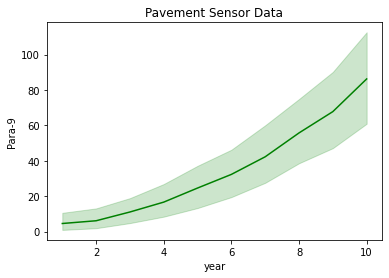

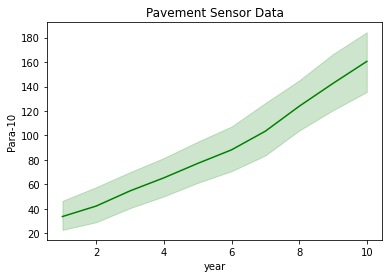

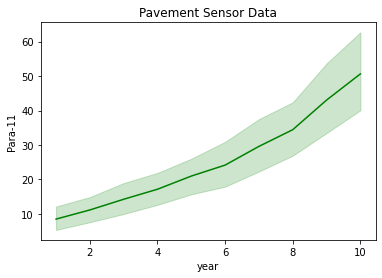

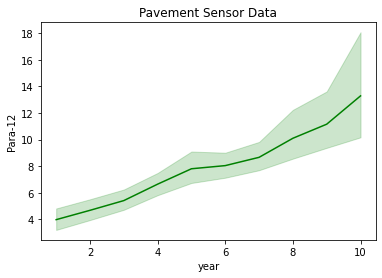

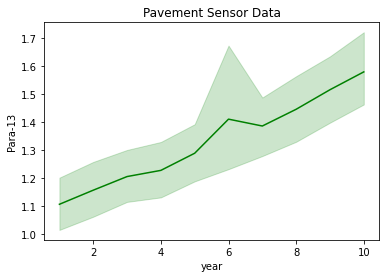

In [26]:
for i in range(9,14):
  fig, ax = plt.subplots()
  sns.lineplot(x='year', y=f'Para-{i}', data=df, color='Green', ax=ax, )
  ax.set(title='Pavement Sensor Data');


In [60]:
y_pred=pd.DataFrame(master_result, dtype='float')
y_pred=y_pred.transpose()
y_pred.columns=['Pred9','Pred10','Pred11','Pred12','Pred13']
y_pred


,Pred9,Pred10,Pred11,Pred12,Pred13
0,0.981990,26.836196,4.906565,4.481908,1.619058
1,25.656543,14.924706,0.246410,4.036746,0.747851
2,38.016052,-0.000005,-0.000005,9.128887,1.278871
3,17.089255,28.852034,30.930036,5.017777,1.651263
4,-0.000005,197.700813,30.018169,2.197364,1.338383
...,...,...,...,...,...
96,90.683225,147.573786,4.699505,5.724953,1.368512
97,1.325385,53.788357,10.616126,10.610558,1.047760
98,56.741962,30.111348,6.562819,9.515297,0.891150
99,170.073149,190.920404,142.022756,5.457336,1.960085


In [75]:
df_pred=pd.concat([y,y_pred], axis=1).reset_index(drop=True)
df_pred

,year,Para-9,Para-10,Para-11,Para-12,Para-13,Pred9,Pred10,Pred11,Pred12,Pred13
0,10.0,16.8,105.0,65.0,9.0,1.960,0.981990,26.836196,4.906565,4.481908,1.619058
1,10.0,76.5,44.3,5.0,9.0,0.795,25.656543,14.924706,0.246410,4.036746,0.747851
2,10.0,78.5,0.0,0.0,16.0,1.432,38.016052,-0.000005,-0.000005,9.128887,1.278871
3,10.0,28.5,60.5,67.0,11.0,2.004,17.089255,28.852034,30.930036,5.017777,1.651263
4,10.0,0.0,276.2,34.0,6.0,1.792,-0.000005,197.700813,30.018169,2.197364,1.338383
...,...,...,...,...,...,...,...,...,...,...,...
96,10.0,5.9,74.5,33.0,13.0,1.087,90.683225,147.573786,4.699505,5.724953,1.368512
97,10.0,131.4,72.4,18.0,12.0,0.996,1.325385,53.788357,10.616126,10.610558,1.047760
98,10.0,193.7,305.6,180.0,12.0,2.212,56.741962,30.111348,6.562819,9.515297,0.891150
99,10.0,293.0,39.8,7.0,18.0,1.889,170.073149,190.920404,142.022756,5.457336,1.960085


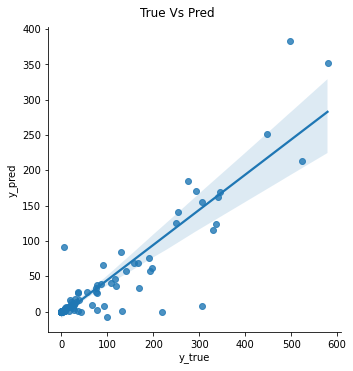

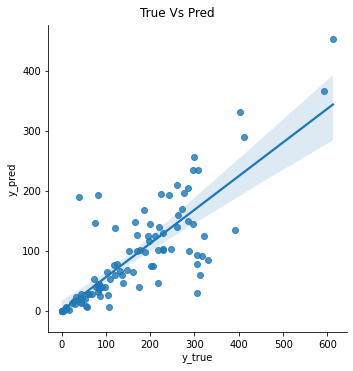

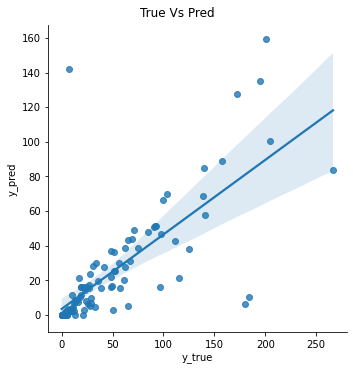

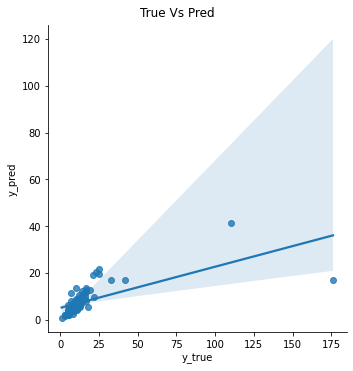

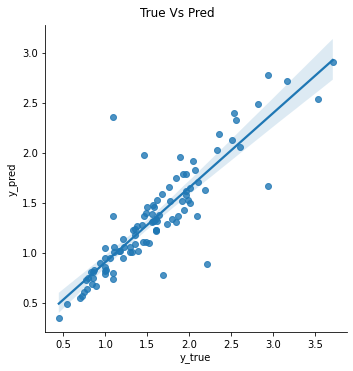

In [77]:
 for i in range(9,14):
  g = sns.lmplot(x=f'Para-{i}', y =f'Pred{i}',data=df_pred)
  g.fig.suptitle('True Vs Pred', y=1.02)
  g.set_axis_labels('y_true', 'y_pred');